# Analyzing Apple Stock News Sentiment with FinBERT and Yahoo Finance

This notebook demonstrates how to use FinBERT, a transformer-based model fine-tuned for financial sentiment analysis, to analyze recent news articles for the Apple(AAPL) stock ticker. We'll use yfinance to fetch the news, transformers for inference, and matplotlib to visualize the sentiment distribution.

## Install Required Packages

In [1]:
%pip install yfinance transformers torch pandas matplotlib


  Using cached transformers-4.52.4-py3-none-any.whl (10.5 MB)
  Using cached matplotlib-3.10.3-cp310-cp310-win_amd64.whl (8.1 MB)
  Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
  Using cached peewee-3.18.1-py3-none-any.whl
  Using cached numpy-2.2.6-cp310-cp310-win_amd64.whl (12.9 MB)
  Using cached beautifulsoup4-4.13.4-py3-none-any.whl (187 kB)
  Using cached protobuf-6.31.1-cp310-abi3-win_amd64.whl (435 kB)
  Using cached requests-2.32.3-py3-none-any.whl (64 kB)
  Using cached websockets-15.0.1-cp310-cp310-win_amd64.whl (176 kB)
  Using cached frozendict-2.4.6-cp310-cp310-win_amd64.whl (37 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Using cached regex-2024.11.6-cp310-cp310-win_amd64.whl (274 kB)
  Using cached filelock-3.18.0-py3-none-any.whl (16 kB)
  Using cached safetensors-0.5.3-cp38-abi3-win_amd64.whl (308 kB)
  Using cached tokenizers-0.21.1-cp39-abi3-win_amd64.whl (2.4 MB)
  Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
  Using cached PyY

You should consider upgrading via the 'c:\Users\Brian\OneDrive - University of Witwatersrand\Desktop\off_the_grid\tutorials\ai\apple_stock_sentiment_analysis\venv\Scripts\python.exe -m pip install --upgrade pip' command.


## Import Libraries

In [2]:
import pandas as pd
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use("dark_background")

c:\Users\Brian\OneDrive - University of Witwatersrand\Desktop\off_the_grid\tutorials\ai\apple_stock_sentiment_analysis\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load FinBERT Sentiment Classifier

In [3]:
model_name = "ProsusAI/finbert"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
classifier = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

Device set to use cpu


## Fetch News for a Stock Ticker

In [4]:
ticker = "AAPL"  
dat = yf.Ticker(ticker)
news = dat.news

## Convert News Content to a DataFrame

In [ ]:
df = pd.DataFrame([item["content"] for item in news])

columns_to_keep = ['title', 'summary', 'pubDate']
df = df[columns_to_keep]

df.head(10)

,title,summary,pubDate
0,Apple WWDC 2025: What to expect from iPhone ma...,Apple (AAPL) will be kicking off its 2025 Worl...,2025-06-08T14:00:31Z
1,Pro Drivers Give Brad Pitt's 'F1' Movie The Th...,"Brad Pitt‘s much-vaunted Formula One movie, “F...",2025-06-08T18:31:40Z
2,"Apple WWDC; Inflation Data; GameStop Earnings,...",The new week kicks off with Apple’s Worldwide ...,2025-06-08T18:00:00Z
3,Warren Buffett's AI Bets: 22% of Berkshire Hat...,"Apple has some proving to do in the AI space, ...",2025-06-08T11:30:00Z
4,Street Calls of the Week,Investing.com -- Here is your Pro Recap of the...,2025-06-08T09:35:35Z
5,Apple is about to answer a burning question ab...,Apple is about to reveal what’s next for its m...,2025-06-08T09:00:03Z
6,What To Expect in Markets This Week: May Infla...,"Coming up: May CPI Inflation Data, Apple Devel...",2025-06-08T09:00:00Z
7,WWDC to focus on redesigns as Apple remains si...,Apple’s (AAPL) upcoming Worldwide Developers C...,2025-06-07T14:20:21Z
8,‘Sextortion’ Scams Involving Apple Messages En...,Criminals exploit the trust teens have in iPho...,2025-06-07T13:00:00Z
9,Here's How Much Traders Expect Apple Stock to ...,Current options pricing suggests markets expec...,2025-06-07T11:30:00Z


## Perform Sentiment Analysis

In [7]:
df["sentiment"] = df["summary"].apply(lambda x: classifier(x)[0]['label'])
df["confidence"] = df["summary"].apply(lambda x: classifier(x)[0]['score'])

df["sentiment"] = df["sentiment"].str.lower()
df.head()

,title,summary,pubDate,sentiment,confidence
0,Apple WWDC 2025: What to expect from iPhone ma...,Apple (AAPL) will be kicking off its 2025 Worl...,2025-06-08T14:00:31Z,neutral,0.897314
1,Pro Drivers Give Brad Pitt's 'F1' Movie The Th...,"Brad Pitt‘s much-vaunted Formula One movie, “F...",2025-06-08T18:31:40Z,positive,0.783848
2,"Apple WWDC; Inflation Data; GameStop Earnings,...",The new week kicks off with Apple’s Worldwide ...,2025-06-08T18:00:00Z,neutral,0.504280
3,Warren Buffett's AI Bets: 22% of Berkshire Hat...,"Apple has some proving to do in the AI space, ...",2025-06-08T11:30:00Z,neutral,0.622088
4,Street Calls of the Week,Investing.com -- Here is your Pro Recap of the...,2025-06-08T09:35:35Z,neutral,0.914881


## Save Results to CSV

In [8]:
filename = f"{ticker}_news_sentiment.csv"
df.to_csv(filename, index=False)
print(f"Saved sentiment results to {filename}")

Saved sentiment results to AAPL_news_sentiment.csv


## Visualize Sentiment Distribution

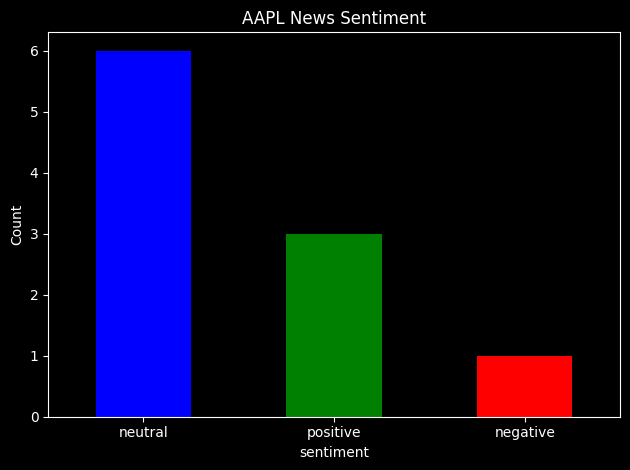

In [9]:
sentiment_counts = df["sentiment"].value_counts()
sentiment_counts.plot(kind="bar", title=f"{ticker} News Sentiment", color=["blue", "green", "red"])
plt.ylabel("Count")
plt.xticks(rotation=0)  
plt.tight_layout()      
plt.savefig(f"{ticker}_sentiment_counts.png")
plt.show()